In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (30, 8)

In [2]:
import cv2 as cv
import numpy as np

In [3]:
!ls -l

total 6680
-rw-r--r-- 1 olli olli    1074 Jan  3 18:19 LICENSE
-rw-r--r-- 1 olli olli  227193 Jan  3 18:19 Lake_Dunlap_collapse.mp4
-rw-r--r-- 1 olli olli     127 Jan  3 18:19 README.md
-rw-r--r-- 1 olli olli  223747 Jan  3 18:19 bbox.ipynb
-rw-r--r-- 1 olli olli 1115584 Feb  4 09:49 bsub.ipynb
-rw-r--r-- 1 olli olli    7334 Jan  3 18:19 cnn.ipynb
-rw-r--r-- 1 olli olli 2084538 Jan  3 18:19 dramatic-change.ipynb
-rw-r--r-- 1 olli olli   25722 Jan  3 18:19 people.jpg
-rw-r--r-- 1 olli olli 2018126 Feb  4 09:37 slow_traffic_small.mp4
-rw-r--r-- 1 olli olli 1115584 Feb  4 09:49 tracking.ipynb


In [4]:
capture = cv.VideoCapture('./slow_traffic_small.mp4')

In [5]:
_, frame = capture.read()

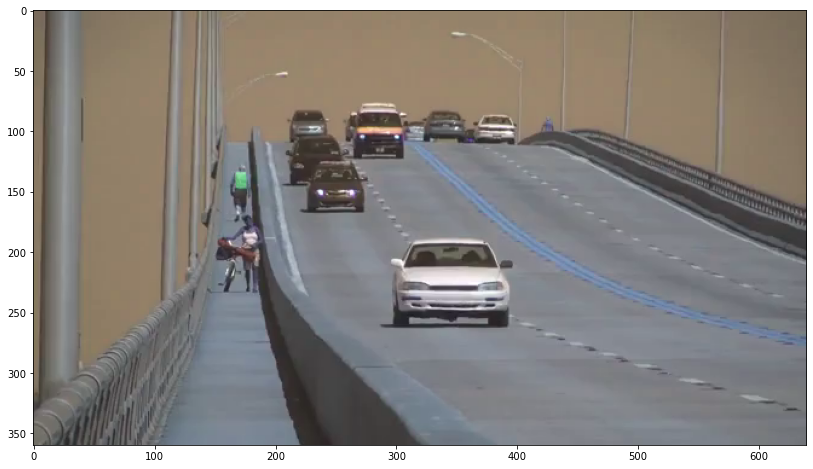

In [7]:
plt.imshow(frame);

In [9]:
# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values
track_window = (x, y, w, h)

# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )

while(1):
    ret, frame = capture.read()

    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        # apply camshift to get the new location
        ret, track_window = cv.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)

        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break


error: OpenCV(4.1.2) /io/opencv/modules/highgui/src/window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
